<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Андрей! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

In [34]:
#Библиотеки

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    
    


- Андрей, у тебя тут есть лишние импорты, их стоит убрать, чтобы поберечь ресурсы  



- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  



<div>

## Откройте и изучите файл

In [21]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


### is_ultra 1 - У клиента подключен тариф "Ультра", is_ultra 0 - у клиента подключен тариф "Смарт"



/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_ultra', ylabel='count'>

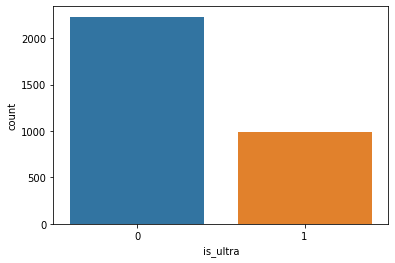

In [22]:
sns.countplot(df["is_ultra"])

In [23]:
df["is_ultra"].value_counts()/len(df)*100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

In [24]:
display(df.describe())
display(df.info())


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

In [25]:
target = "is_ultra"
features = ["calls", "minutes", "messages", "mb_used"]

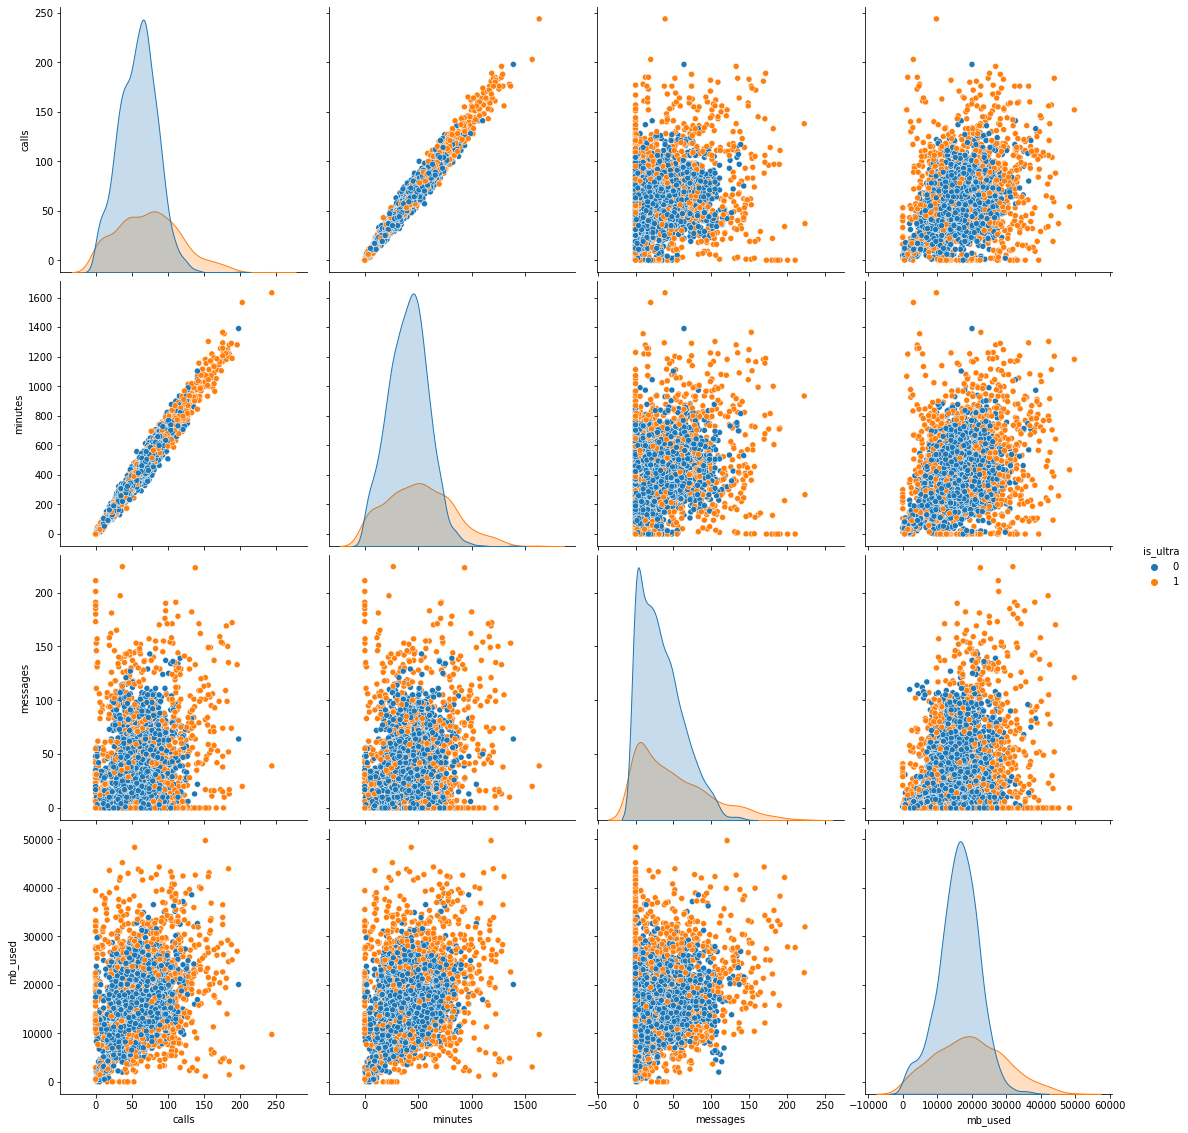

In [27]:
sns.pairplot(df, hue=target, height=4)
plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:


- Если хочешь убрать AxesSubplot:xlabel..  то ставь в конце `;` или пропиши plt.show()


- на этом графике Мы в частности можем видеть высокую корреляцию между minutes и calls. Знаешь что такое мультиколлинеарность между признаками и что с ней делают чтобы качество модели улучшить?


<font color = 'green'>Мультиколлинеарность — явление, при котором наблюдается сильная корреляция между признаками. Чтобы оценить степень корреляции между парой количественных признаков, вычисляют, например, коэффициент корреляции Пирсона — меру линейной связи между ними. Если абсолютное значение коэффициента превышает некоторый порог, то можно говорить о наличии сильной корреляции между признаками. На практике пороговое значение зависит от задачи и находится в диапазоне от 0.6 до 1.0. Большинство методов устранения мультиколлинеарности предполагает исключение порождающих её признаков. Предлагаю удалить из списка фичей, например количество звонков.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:
  
Правильно.  Но насчёт удаления, есть детали:


- Первый момент: мультиколлинеарность проблема линейных моделей - могут переобучаться.... теоретически. Но в логистической, и в линейной регрессиях реализована регуляризация, которая решает проблему мультиколлинеарности признаков. "Деревянные" модели (RF, DT) устойчивы к мультиколлинеарности, а кластеризация тоже почти не зависит от линейных зависимостей. Получается, избавляться от мультиколлинеарности чтобы не переобучаться не обязательно )) 
    
    
- Второй момент: интерпретируемость линейной модели (мы по коеффициентам судим как признаки влияют на таргет), тут  мультиколлинеарность надо убирать.


Так что получается что в нашем случае убирать мультиколлинеарность имеет смысл только если мы захотим посмотреть как конкретно признаки влияют на Таргет


In [28]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [29]:
features = ["minutes", "messages", "mb_used"]

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Данные изучены.

И проверить целевой признак на сбалансированность хороший ход, это по сути решение бонусное задание сразу.  


## Разбейте данные на выборки

In [30]:
#Воспользуемся функцией train_test_split
df_train, df_valid = train_test_split(df, test_size=0.30, random_state=12345)

df_valid, df_test = train_test_split(df_valid, test_size = 0.5, random_state=12345)

print('Размер обучающей выборки:', df_train.shape[0],'объектов')
print('Размер валидационной выборки:', df_valid.shape[0],'объекта')
print('Размер тестовой выборки:',df_test.shape[0],'объекта')

Размер обучающей выборки: 2249 объектов
Размер валидационной выборки: 482 объекта
Размер тестовой выборки: 483 объекта


In [32]:
print(f"train = {100*len(df_train)/len(df):.4f}%")
print(f"valid = {100*len(df_valid)/len(df):.4f}%")
print(f"test = {100*len(df_test)/len(df):.4f}%")

train = 69.9751%
valid = 14.9969%
test = 15.0280%


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все правильно!

Здорово что проконтролировано разбиение (можно с помощью .shape,  можно .len)


<div class="alert alert-warning">



Совет: 


- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут





## Исследуйте модели

In [33]:
# Присвоим переменным features(признаки) и target (цели)
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

# Валидационная выборка
valid_features = df_valid.drop(['is_ultra'], axis=1)
valid_target = df_valid['is_ultra']

# Обучающая выборка
train_features = df_train.drop(['is_ultra'], axis=1)
train_target = df_train['is_ultra']

# Тестовая выборка
test_features = df_test.drop(['is_ultra'], axis=1)
test_target = df_test['is_ultra']


Глубина 1:
Точность (Accuracy):			 0.7510373443983402

Глубина 2:
Точность (Accuracy):			 0.7800829875518672

Глубина 3:
Точность (Accuracy):			 0.7863070539419087

Глубина 4:
Точность (Accuracy):			 0.7883817427385892

Глубина 5:
Точность (Accuracy):			 0.7614107883817427

Глубина 6:
Точность (Accuracy):			 0.7842323651452282

Глубина 7:
Точность (Accuracy):			 0.7821576763485477

Глубина 8:
Точность (Accuracy):			 0.7821576763485477

Глубина 9:
Точность (Accuracy):			 0.7780082987551867




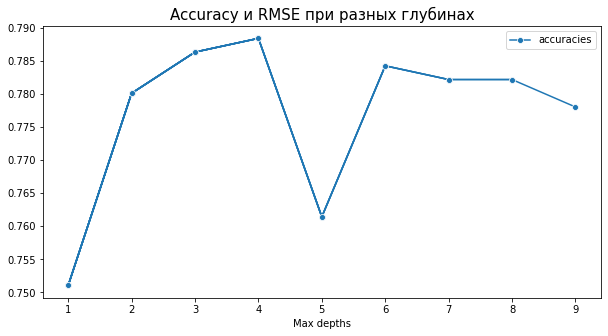

In [38]:
# Модель Дерево Решений и разные глубины
depths = []
accuracies = []
RMSE = []

plt.figure(figsize=(10, 5))

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    result = mean_squared_error(valid_target, predictions  ) ** 0.5
    depths.append(depth)
    accuracies.append(score)
    RMSE.append(result)
    df = pd.DataFrame({'accuracies': accuracies}, index=depths)
    ax = sns.lineplot(data=df, markers=True, dashes=False)
    ax.set(xlabel='accuracies')
    ax.legend(['accuracies'])
    #plt.legend('')
    print('\nГлубина', depth,  end=':\n')
    print('Точность (Accuracy):\t\t\t', score)
    #print('Корень из суммы квадратов ошибок (RMSE):', result,  end='\n')

print('\n')
plt.title("Accuracy при разных глубинах", fontsize=15) 
plt.ylabel("") 
plt.xlabel("Max depths")
plt.show()
print('\n\n')


<font color = 'green'> У модели дерево решений, лучший результат при глубине 4: 
точность - 0.7883817427385892;
RMSE - 0.46001984442131494

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
Работа выполнена в соответствии с критериями: 



 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле


График это здорово, но обычно смотрят на метрики качества и по валидации и по train, и на основании увиденного и делают вывод о моменте переобучения. А метрику RMSE мы  тут не смотрим, ведь это Метрика для задачи регрессии. И можно взять глубину побольше, чтобы воочию увидеть процесс переобучения



<div class="alert alert-warning">


Совет: 

    

- tree_plot можно построить, с max_depth равной 3 или 4 (глубже уже будет громоздко) - глянуть как DT сплиты делает, будет понимание как модель принимает решения: какие признаки  использует, на каких значениях делает разбиение вправо - влево 




- Можно использовать конструкцию if, чтобы записать лучшие параметры, модель и лучшую метрику 



 15%|█▌        | 3/20 [00:00<00:00, 23.49it/s]


Эстиматоров 1:
Точность (Accuracy):			 0.6991701244813278

Эстиматоров 2:
Точность (Accuracy):			 0.7489626556016598

Эстиматоров 3:
Точность (Accuracy):			 0.7448132780082988

Эстиматоров 4:
Точность (Accuracy):			 0.7634854771784232

Эстиматоров 5:
Точность (Accuracy):			 0.7531120331950207


 40%|████      | 8/20 [00:00<00:00, 14.92it/s]


Эстиматоров 6:
Точность (Accuracy):			 0.7759336099585062

Эстиматоров 7:
Точность (Accuracy):			 0.7800829875518672

Эстиматоров 8:
Точность (Accuracy):			 0.7863070539419087

Эстиматоров 9:
Точность (Accuracy):			 0.7676348547717843


 60%|██████    | 12/20 [00:00<00:00, 13.55it/s]


Эстиматоров 10:
Точность (Accuracy):			 0.7780082987551867

Эстиматоров 11:
Точность (Accuracy):			 0.7697095435684648

Эстиматоров 12:
Точность (Accuracy):			 0.7738589211618258


 70%|███████   | 14/20 [00:01<00:00, 12.53it/s]


Эстиматоров 13:
Точность (Accuracy):			 0.7842323651452282

Эстиматоров 14:
Точность (Accuracy):			 0.7883817427385892


 80%|████████  | 16/20 [00:01<00:00, 11.22it/s]


Эстиматоров 15:
Точность (Accuracy):			 0.7842323651452282

Эстиматоров 16:
Точность (Accuracy):			 0.7904564315352697


 90%|█████████ | 18/20 [00:01<00:00, 10.32it/s]


Эстиматоров 17:
Точность (Accuracy):			 0.7863070539419087

Эстиматоров 18:
Точность (Accuracy):			 0.7987551867219918


100%|██████████| 20/20 [00:01<00:00, 11.68it/s]


Эстиматоров 19:
Точность (Accuracy):			 0.7925311203319502

Эстиматоров 20:
Точность (Accuracy):			 0.7904564315352697




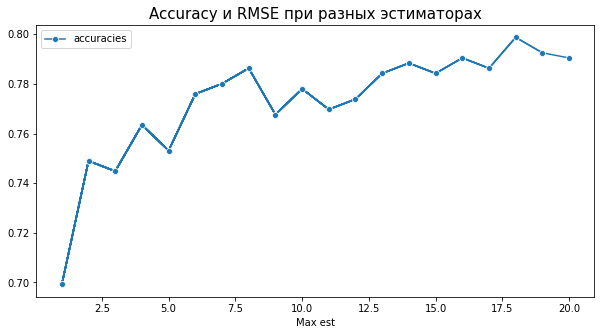

In [37]:
# Случайный лес с разным количеством деревьев
estimators = []
accuracies = []
RMSE = []

plt.figure(figsize=(10, 5))

for est in tqdm(range(1,21)):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    result = mean_squared_error(valid_target, predictions  ) ** 0.5
    estimators.append(est)
    accuracies.append(score)
    RMSE.append(result)
    df = pd.DataFrame({'accuracies': accuracies}, index=estimators)
    ax = sns.lineplot(data=df, markers=True, dashes=False)
    ax.set(xlabel='accuracies')
    ax.legend(['accuracies'])
    #plt.legend('')
    print('\nЭстиматоров', est,  end=':\n')
    print('Точность (Accuracy):\t\t\t', score)
    #print('Корень из суммы квадратов ошибок (RMSE):', result,  end='\n')

print('\n')
plt.title("Accuracy при разных эстиматорах", fontsize=15) 
plt.ylabel("") 
plt.xlabel("Max est")
plt.show()
print('\n\n')


<font color = 'green'> У модели случайный лес, лучший результат при n_estimators 18: 
точность - 0.7925311203319502;
RMSE - 0.45548751867427695


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
    
    
    
Совет:


- Андрей, можно было сделать похитрее, RF одна из лучших моделей в классическом machine-learning, поэтому можно было добавить перебор 2 гиперпараметров в двойном цикле, в результата метрика качества вырастет. 
 


- Когда что то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить )) 
    
    Или tqdm, это ещё лучше, потому что он показывает интерактивно, на каком этапе расчетов мы находимся

    
    from tqdm import tqdm


    for n_estimators in tqdm(range(3,58)):

        ..........



(дальше мы будем уходить от неэффективных в питоне циклов к apply.  Там тоже есть аналог прогресс-баров:  .progress_apply)
    
И будет красиво )   
 

    
- Видишь ли тут разницу в поведении метрики на валидации у дерева решений случайного леса, можешь объяснить разницу      


Итераторов 100:
Точность (Accuracy):			 0.6908713692946058

Итераторов 200:
Точность (Accuracy):			 0.6908713692946058

Итераторов 300:
Точность (Accuracy):			 0.6908713692946058

Итераторов 400:
Точность (Accuracy):			 0.6908713692946058

Итераторов 500:
Точность (Accuracy):			 0.6908713692946058

Итераторов 600:
Точность (Accuracy):			 0.6908713692946058

Итераторов 700:
Точность (Accuracy):			 0.6908713692946058

Итераторов 800:
Точность (Accuracy):			 0.6908713692946058

Итераторов 900:
Точность (Accuracy):			 0.6908713692946058

Итераторов 1000:
Точность (Accuracy):			 0.6908713692946058




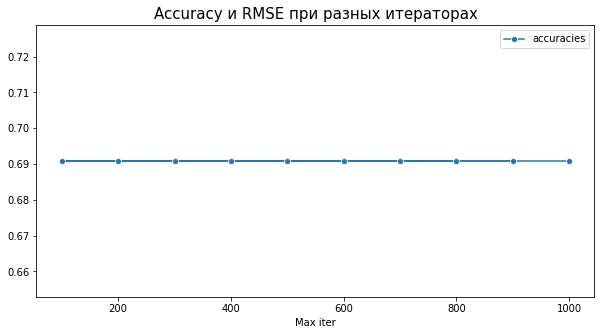

In [36]:
# Логисьтческая регрессия с разным параметром max_iter
max_iters = []
accuracies = []
RMSE = []

plt.figure(figsize=(10, 5))

for itr in range(100,1001,100):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=itr)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    score = accuracy_score(valid_target, predictions)
    result = mean_squared_error(valid_target, predictions  ) ** 0.5
    max_iters.append(itr)
    accuracies.append(score)
    RMSE.append(result)
    df = pd.DataFrame({'accuracies': accuracies}, index=max_iters)
    ax = sns.lineplot(data=df, markers=True, dashes=False)
    ax.set(xlabel='accuracies')
    ax.legend(['accuracies'])
    #plt.legend('')
    print('\nИтераторов', itr,  end=':\n')
    print('Точность (Accuracy):\t\t\t', score)
    #print('Корень из суммы квадратов ошибок (RMSE):', result,  end='\n')

print('\n')
plt.title("Accuracy при разных итераторах", fontsize=15) 
plt.ylabel("") 
plt.xlabel("Max iter")
plt.show()
print('\n\n')

<font color = 'green'> У модели логистической регрессии:
точность - 0.6908713692946058
RMSE - 0.5559933728970106


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Все верно, RF лучший. 


<div class="alert alert-warning">


Совет: 

Если есть желание можешь ответить на вопросики ))    



- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?


- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?


- Мы решаем задачу классификации (а еще есть задача регрессии), а в названии модели с помощью которой мы решаем задачу "классификации" (Логистическая регрессия) есть слово "регрессия".  Нет ли тут парадокса? )
    

- Почему логистическая регрессия показывать на много более худшие результаты?  


</div>





## Проверьте модель на тестовой выборке

In [14]:
#Проверим модель: Случайный лес на тестовой выборке при 18 деревьях
model = RandomForestClassifier(random_state=12345, n_estimators=18)
model.fit(train_features,train_target)
predictions = model.predict(test_features)
score = accuracy_score(test_target, predictions)
print('Accuracy:', score)

Accuracy: 0.782608695652174





<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель (или парочку, если метрики были близки) отобранную на валидации. 

- Если студент получил на тесте accuraсy  выше 0,78, это считается отличным результатом. 
    
    

<div class="alert alert-warning">

Вопросики и совет:




- Как попробовать улучшить результат, не мучаясь с кодом?! Смотри - мы сформировали train выборку на которой обучаем модель, а валидационную используем для поиска лучших значений гиперпараметров. Оке, нашли их. Так почему бы теперь модель с выбранными гиперпараметрами не обучить на тренировочной + валидационной выборке (только не нужно делать новые сплиты, используй pd.concat(), к примеру)?! Чем больше данных, тем лучше модель может обучиться. И эту дообученную модель проверим на тесте. Гаранитий что станет лучше нет, но ML это постоянные эксперименты.  
    
    
- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги? 




- Андрей, в качестве бонуса можешь вывести еще несколько метрик своей модели - precision, recall, F1 и confussion matrix) Все есть в sklearn)



## (бонус) Проверьте модели на адекватность

In [15]:
df = pd.read_csv('/datasets/users_behavior.csv')
df["is_ultra"].value_counts()/len(df)*100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

Доля Смарт тарифов - 69%. А точность предсказаний - 79%. Кажется, что точность ответов (считай кол-вл правильных ответов к общему числу N), выше чем доля Смарт тарифов. Кажется. модель адекватна

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет:


Тут логика такая - у нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.
      
    
С   DummyClassifier это выглядит  так:
    
    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс
    
    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"
    
    .predict(features_test)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score
    
Получаем тот же результат: acc около 69%.    



Сравниваем с accuracy нашей модели и делаем вывод
<div>



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
    
    
Совет: 

    
    
А смысл проверки бонусного задания, это сравнение прогноза нашей модели и наивной модели. Ключ решения бонусного задания - это проверка дисбаланса.  Но немножко непонятно звучит фраза "считай кол-вл правильных ответов к общему числу N". Можешь пояснить что ты имел в виду    
    
При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




Андрей, у тебя старательно выполненная работа, все четко, осмысленно. Вижу у тебя получается в ML,  дальше будет интересней )  



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)

    
    

Замечания на будущее:
    

- Комментарии к коду отсутствуют - коллеги могут не понять хода твоих мыслей, пока вроде код простой, но стоит держать в голове что дальше код усложнится.  
- Было бы замечательно, в выводе немножко о данных, работе с ними (пусть даже никакой работы и не было), моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.

 
    
Что стоит подправить:




- метрики качества для задач регрессии одни, для задач классификации другие 


    
    
    
Посылаю на вторую итерацию, чтобы ответить на вопросы если они появятся




</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    

Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Андрей. Желаю успехов в дальнейшей учебе!



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
